In [9]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
spark

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 11, Finished, Available, Finished)

In [10]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 12, Finished, Available, Finished)

In [11]:
from pyspark.sql.types import StructField, StructType, StringType, DateType, BooleanType, IntegerType, DecimalType, DateType
from pyspark.sql.functions import *
from pyspark.sql.window import Window

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 13, Finished, Available, Finished)

In [12]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
# Read the CSV file into a DataFrame
ball_by_ball_df = spark.read.format("csv").schema(ball_by_ball_schema).options(header = "True").load("Files/Ball_By_Ball.csv")
display(ball_by_ball_df)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 14, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 953240d3-9425-4427-9cb2-b9cac4b54d52)

In [13]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.csv("Files/Match.csv", header=True, schema=match_schema)
match_df = match_df.withColumn("match_date", to_date("match_date", "yyyy-MM-dd"))
display(match_df)



StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 15, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 311abbec-741b-4783-b8e8-335ad96c3694)

In [14]:
match_df.printSchema()

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 16, Finished, Available, Finished)

root
 |-- match_sk: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- match_date: date (nullable = true)
 |-- season_year: integer (nullable = true)
 |-- venue_name: string (nullable = true)
 |-- city_name: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- match_winner: string (nullable = true)
 |-- toss_name: string (nullable = true)
 |-- win_type: string (nullable = true)
 |-- outcome_type: string (nullable = true)
 |-- manofmach: string (nullable = true)
 |-- win_margin: integer (nullable = true)
 |-- country_id: integer (nullable = true)



In [15]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), False),
    StructField("player_id", IntegerType(), False),
    StructField("player_name", StringType(), False),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df = spark.read.csv("Files/Player.csv", header=True, schema=player_schema)



StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 17, Finished, Available, Finished)

In [16]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), False),
    StructField("playermatch_key", DecimalType(10, 2), False),
    StructField("match_id", IntegerType(), False),
    StructField("player_id", IntegerType(), False),
    StructField("player_name", StringType(), False),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), False),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
player_match_df = spark.read.csv("Files/Player_match.csv", header=True, schema=player_match_schema)
display(player_match_df)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 710dba02-4f9f-43ca-846a-f1ccc50c7b03)

In [17]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id",IntegerType(), True ),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.csv("Files/Team.csv", header=True, schema=team_schema)


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 19, Finished, Available, Finished)

In [18]:
#Filter to include only valid deliveries excluding like wides and no ballls 
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("TotalRuns"),
    avg("runs_scored").alias("AvgRuns")
)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 20, Finished, Available, Finished)

In [19]:
# Window FUnction: Calculate running total of runs in each match for each over
ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs", sum("runs_scored").over(Window.partitionBy("match_id","innings_no").orderBy("over_id"))
)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 21, Finished, Available, Finished)

In [20]:
#WindowsSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

#ball_by_ball_df = ball_by_ball_df.withColumn(
  #  "running_total_runs", sum("runs_scored").over(WindowsSpec))


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 22, Finished, Available, Finished)

In [21]:
# Conditional Column: Flag for high impact balls ( either a wicket or more than 6 runs including extra)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact", when((col("runs_scored") + col("extra_runs") > 6) | col("bowler_wicket") == True, True).otherwise(False)
)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 23, Finished, Available, Finished)

In [22]:
display(ball_by_ball_df)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 24, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 57bca752-9cf3-44ba-b29b-9bd4baf99a42)

In [23]:
# Extracting year, month, and day from the match date for more detailed time-based analysis

match_df = match_df.withColumn("Year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'

match_df = match_df.withColumn("win_margin_category", when(col("win_margin") >= 100, "High")
.when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
.otherwise("Low"))

# Analyze the impact of the toss: who wins the toss and the match

match_df = match_df.withColumn("toss_match_winner", when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No"))

display(match_df)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 25, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ae084613-bf32-4bd8-86b1-86c0d8684ecc)

In [24]:
# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand":"Unknown", "bowling_skill": "Unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

player_df.show(2)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 26, Finished, Available, Finished)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [25]:
# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
      "veteran_status",
      when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

player_match_df = player_match_df.withColumn(
      "years_since_debut", 
      (year(current_date())- col("season_year"))
)
display(player_match_df)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 27, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6ac71be0-2125-4c46-bc5f-f904e93ec020)

In [26]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_matc")
match_df.createOrReplaceTempView("match")
team_df.createOrReplaceTempView("team")

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 28, Finished, Available, Finished)

In [27]:
scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs,
row_number() over (PARTITION BY m.season_year order by sum(b.runs_scored) desc) as rank
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 29, Finished, Available, Finished)

In [28]:
display(scoring_batsmen_per_season)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 30, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c914bdaf-434c-458a-9cec-2d8e9344302d)

In [29]:
top_scoring_batsmen_per_season = spark.sql("""
WITH season_batsmen AS (
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs,
        ROW_NUMBER() OVER (PARTITION BY m.season_year ORDER BY SUM(b.runs_scored) DESC) AS rank
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id   
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
)
SELECT player_name, season_year, total_runs
FROM season_batsmen
WHERE rank = 1
ORDER BY season_year
""")

top_scoring_batsmen_per_season.show()


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 31, Finished, Available, Finished)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|    se marsh|       2008|       614|
|   ml hayden|       2009|       571|
|sr tendulkar|       2010|       615|
|    ch gayle|       2011|       598|
|    ch gayle|       2012|       720|
|  mek hussey|       2013|       732|
|  rv uthappa|       2014|       659|
|   da warner|       2015|       554|
|     v kohli|       2016|       962|
|   da warner|       2017|       634|
+------------+-----------+----------+



In [30]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player p ON b.bowler = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 32, Finished, Available, Finished)

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|           18|
|     avesh khan|               0.5|           12|
|       aj finch|               0.5|            6|
|     ankit soni|               0.5|            6|
|      gr napier|               0.5|            6|
|        a zampa|               0.5|            6|
|       nb singh|0.5833333333333334|           24|
|     ag murtaza|0.6538461538461539|           78|
|      sb bangar|0.6666666666666666|           18|
|     d du preez|0.6666666666666666|           18|
|        s gopal|0.6666666666666666|            6|
|     fh edwards|0.6923076923076923|           78|
|       a kumble|0.7685185185185185|          108|
|       umar gul|0.7777777777777778|           36|
|   kp pietersen|0.7777777777777778|           18|
|j syed mohammad|0.7777777777777778|           18|
|    rj peterson|0.833333333333

In [31]:
toss_impact_individual_matches = spark.sql("""
select m.match_id, m.toss_winner,m.toss_name, m.match_winner,
case 
when m.toss_winner = m.match_winner then 'Won' else 'Loss' end as match_outcome
from match m
where toss_name is not null
order by match_id
""")

display(toss_impact_individual_matches)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 33, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f5e7fac6-4b97-4f4b-ab17-93d9c320f7c4)

In [32]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins desc
""")
average_runs_in_wins.show()

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 34, Finished, Available, Finished)

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   rashid khan|               6.0|             1|
| shahid afridi|3.3333333333333335|             6|
|      an ahmed|               3.0|             3|
|      ba bhatt|               3.0|             2|
|       sn khan|2.5789473684210527|            19|
|    sp jackson|               2.4|             5|
| harmeet singh|2.3333333333333335|             6|
|      umar gul|2.3076923076923075|            13|
|    sm pollock|               2.2|            15|
|       ms gony|2.1379310344827585|            29|
|   ds kulkarni|               2.0|             3|
|      rs sodhi|               2.0|             2|
|       pr shah|               2.0|             4|
|mj mcclenaghan|               2.0|            11|
| shivam sharma|               2.0|             2|
|     vrv singh|               2.0|             2|
| cr brathwaite|1.9642857142857

In [33]:
import matplotlib.pyplot as plt

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 35, Finished, Available, Finished)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 38, Finished, Available, Finished)

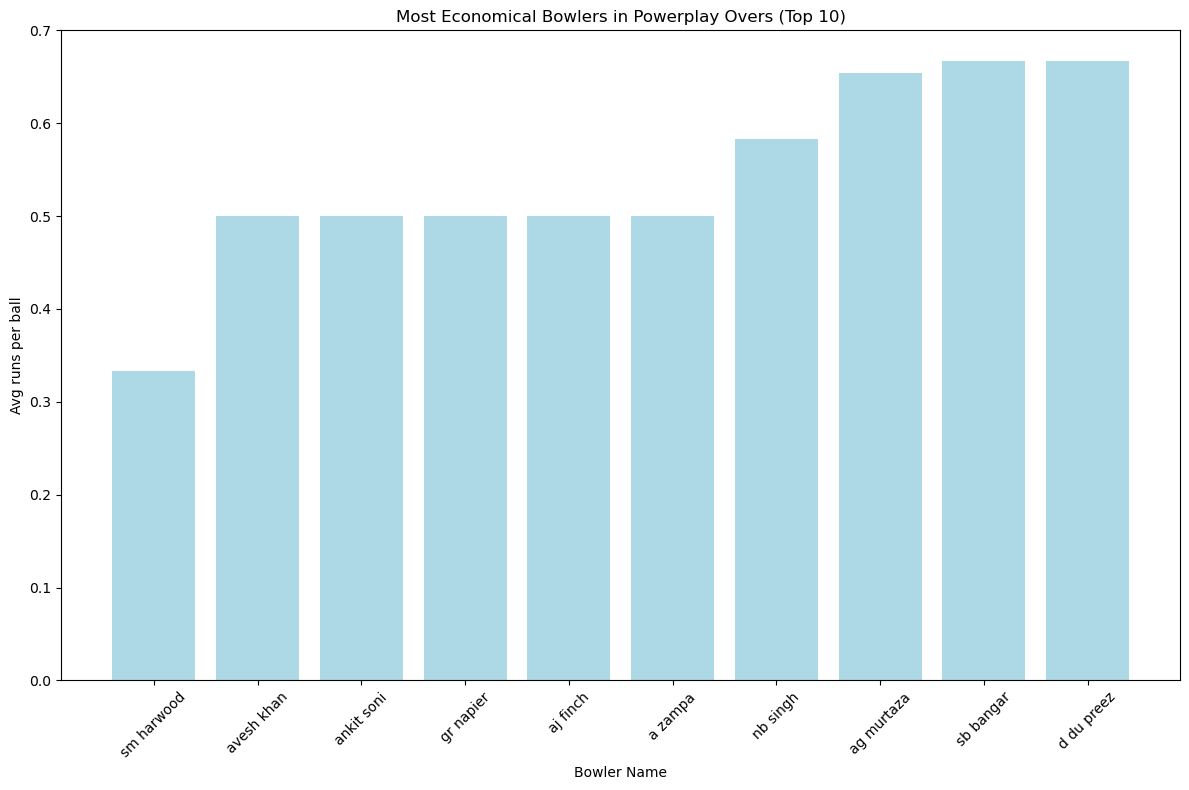

In [36]:
economical_bowlers_powerplay = economical_bowlers_powerplay.toPandas()
plt.figure(figsize=(12,8))
top_economical_bowlers = economical_bowlers_powerplay.nsmallest(10,'avg_runs_per_ball') # nsmallest is used to calculate top n smallest values
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'],color = 'lightblue')
plt.xlabel("Bowler Name")
plt.ylabel("Avg runs per ball")
plt.title("Most Economical Bowlers in Powerplay Overs (Top 10)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [37]:
import seaborn as sns

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 39, Finished, Available, Finished)

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 40, Finished, Available, Finished)

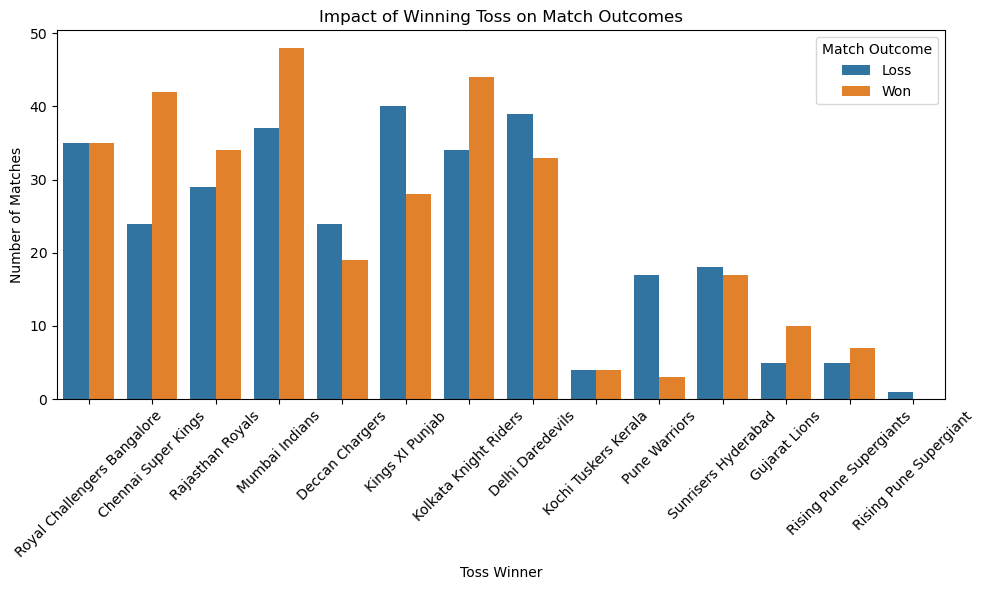

In [38]:
toss_impact_individual_matches = toss_impact_individual_matches.toPandas()
# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_individual_matches)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 41, Finished, Available, Finished)

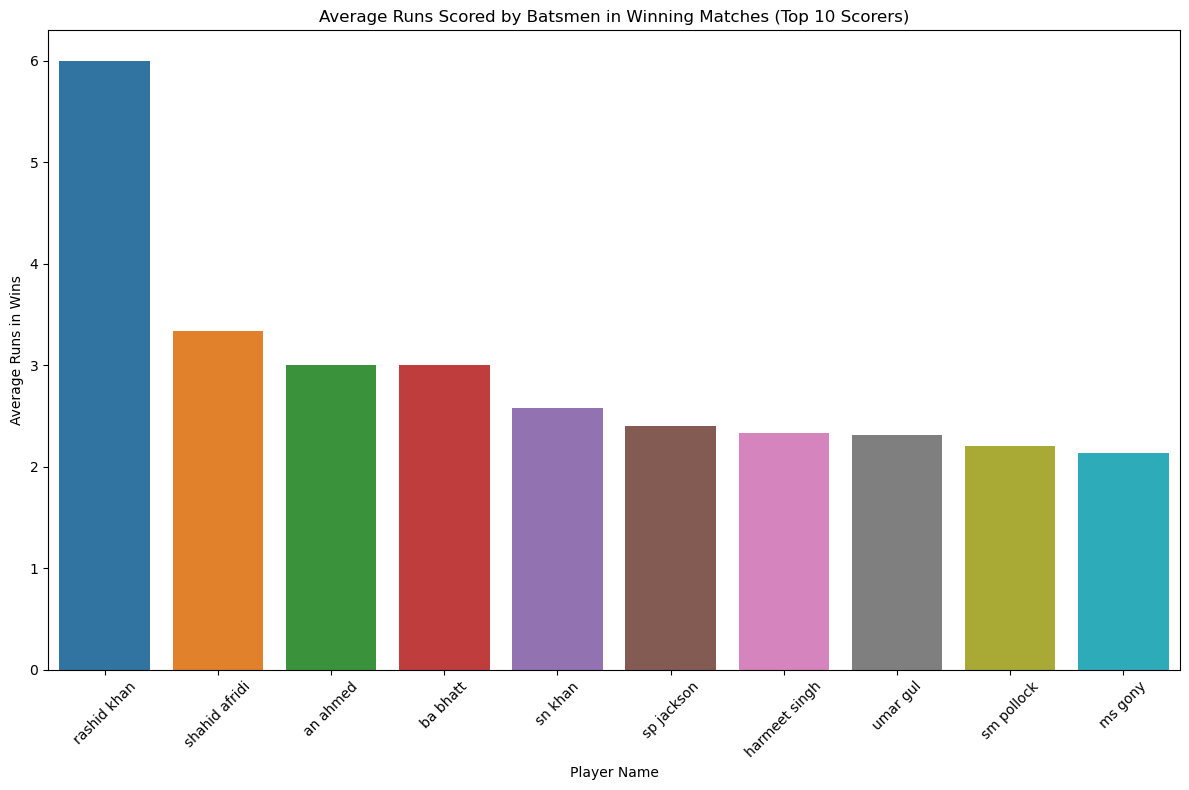

In [39]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
scores_by_venue = spark.sql("""
 with scores_by_venue as (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
 )

select venue_name, avg(total_runs) as avg_scores, max(total_runs) as highest_score
from scores_by_venue
group by venue_name
order by avg_scores desc
""")

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 42, Finished, Available, Finished)

In [41]:
scores_by_venue.show()

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 43, Finished, Available, Finished)

+--------------------+------------------+-------------+
|          venue_name|        avg_scores|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 49, Finished, Available, Finished)

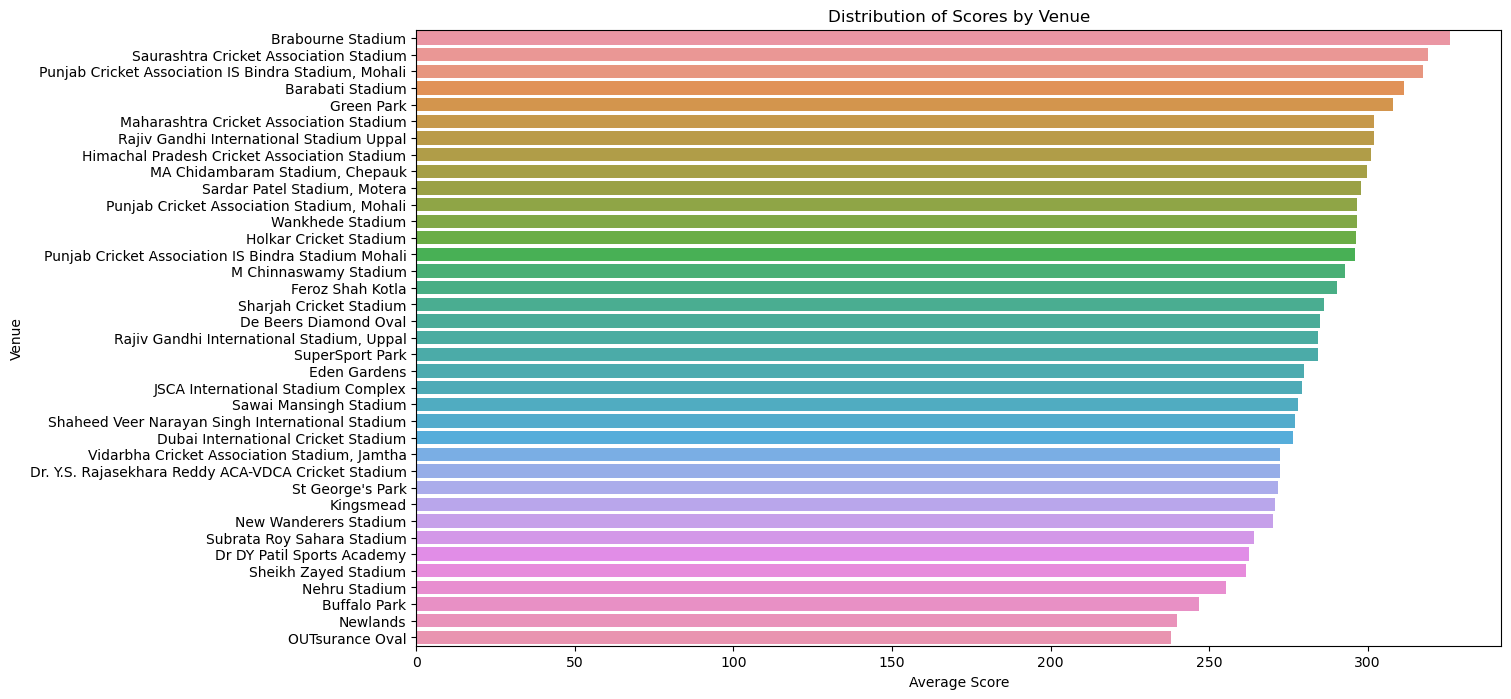

In [47]:
# Convert to Pandas DataFrame
#scores_by_venue = scores_by_venue.toPandas()
# Plot
plt.figure(figsize=(14, 8))

sns.barplot(x='avg_scores', y='venue_name', data=scores_by_venue)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [49]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

dismissal_types.show()


StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 51, Finished, Available, Finished)

+--------------------+---------+
|            out_type|frequency|
+--------------------+---------+
|      Not Applicable|   137852|
|              caught|     3678|
|              bowled|     1382|
|             run out|      744|
|        Keeper Catch|      695|
|                 lbw|      455|
|             stumped|      222|
|   caught and bowled|      211|
|        retired hurt|        9|
|          hit wicket|        9|
|obstructing the f...|        1|
+--------------------+---------+



StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 53, Finished, Available, Finished)

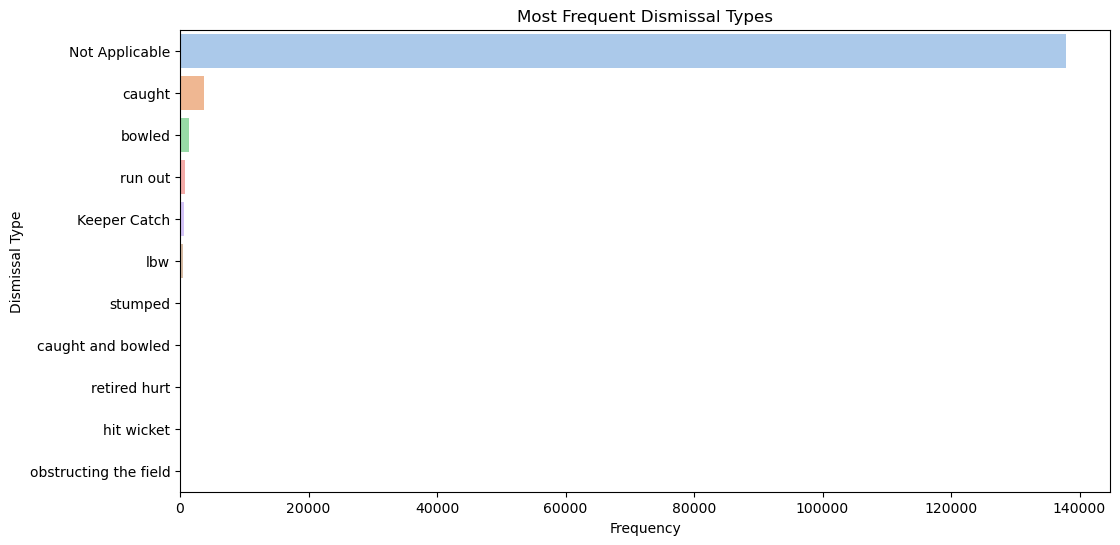

In [51]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [52]:
# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

team_toss_win_performance.show()

StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 54, Finished, Available, Finished)

+--------------------+--------------+---------------+
|               team1|matches_played|wins_after_toss|
+--------------------+--------------+---------------+
| Chennai Super Kings|            37|             27|
|      Mumbai Indians|            42|             26|
|Kolkata Knight Ri...|            36|             24|
|Royal Challengers...|            34|             19|
|    Delhi Daredevils|            36|             17|
|    Rajasthan Royals|            25|             16|
|     Kings XI Punjab|            32|             14|
| Sunrisers Hyderabad|            16|              8|
|     Deccan Chargers|            22|              6|
|Rising Pune Super...|             6|              4|
|       Gujarat Lions|             7|              3|
|Kochi Tuskers Kerala|             4|              2|
|       Pune Warriors|            10|              2|
+--------------------+--------------+---------------+



StatementMeta(, 8cb71908-8e9f-4910-a8a2-53b2aed053b6, 55, Finished, Available, Finished)

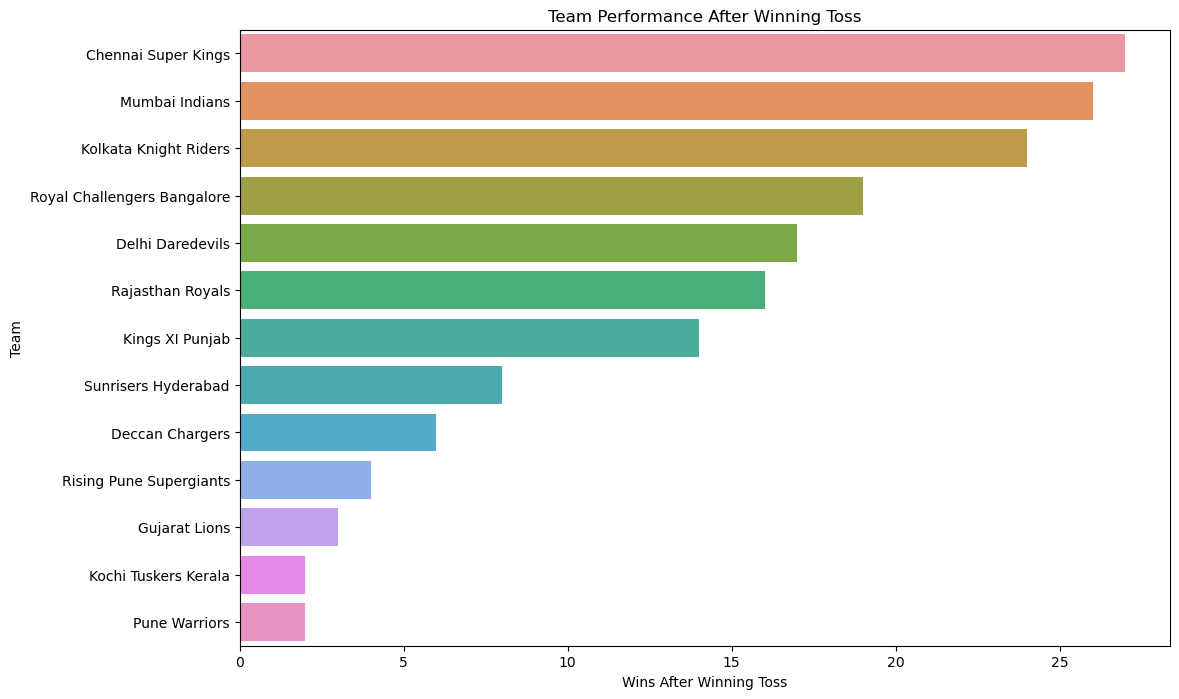

In [53]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()